## Multivariate Polynomial Regression for `Cholesterol `



---

Due to the anomalies found for the "cholesterol" variable the previous section, the project team went ahead to explore different methods to go about this issue. A total of 3 methods were explored in this section. 

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import copy
from scipy.stats import chi2_contingency
sb.set() 
sb.set_theme(rc={'figure.max_open_warning': 0})
import plotly.graph_objects as go

In [ ]:
from google.colab import files
data_to_load = files.upload()
heartdata = pd.read_csv('heart.csv')
heartdata.head()



Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Of the 11 predictor variables, 5 are numeric and 6 are categorical
Create separate dataframes for the two different types of data

In [ ]:
numeric_df = pd.DataFrame(heartdata[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']])
categorical_df = pd.DataFrame(heartdata[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ]])


In [ ]:
numeric_df.describe()    

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


###### Notice `Cholesterol` column has a significant number of '0' values:
Mean is far lower than median implying a positively skewed distribution

A closer look: it wasn't due to outlier values but '0' values, which is impossible as serum cholesterol cannot be 0.

Therefore, the 0 must be a 'NA' data, and we decided to proceed with two methods:

A. Remove rows with '0' entirely

B. Replace rows containing '0' in 'Cholesterol with a polymulti regression of best counterpart numeric variables

C. Replace rows containing '0' in 'Cholesterol' with median of Cholesterol


---
###### Method A: remove all '0

In [ ]:
## Method A -- remove all '0'

numeric_df_0r = numeric_df.loc[heartdata["Cholesterol"] != 0 ]
numeric_df_0r.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


---
###### Method B: replace '0' with median `Cholesterol` values

In [ ]:
numeric_df_rp = copy.deepcopy(numeric_df)
numeric_df_rp['Cholesterol'] = numeric_df["Cholesterol"].replace([0], numeric_df["Cholesterol"].median())
numeric_df_rp.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,240.581699,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.982967,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


---
###### Method C: replace '0'  with Polynomial Multivariate regression:

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression() # Create a Linear Regression object


Initially we decided to apply a linear regression model using the continuous varibles to predict Cholestrol values. However, the correlation values against Cholesterol are insignificant to utilise therefore we decided to use a polynomial Multivariate regression. 

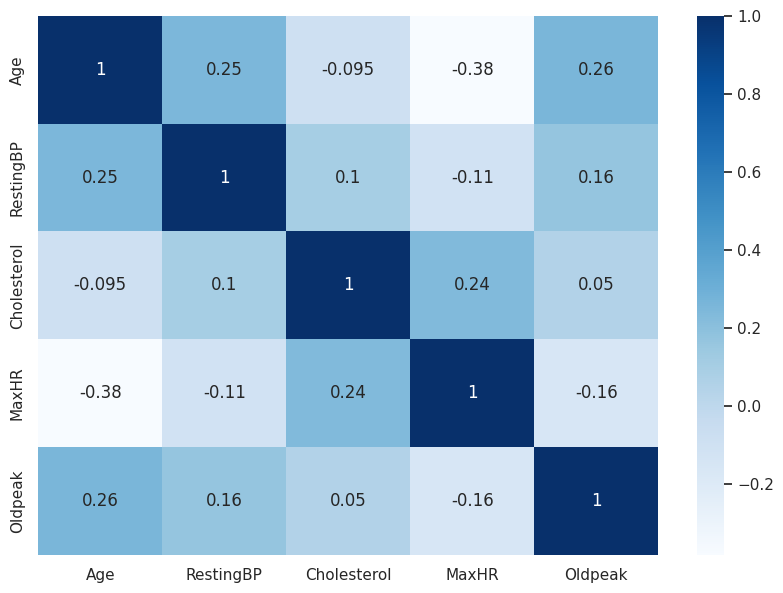

In [ ]:
numeric_predictors_hd = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]  
plt.figure(figsize=(10,7))
sb.heatmap(heartdata[numeric_predictors_hd].corr(),annot=True,cmap="Blues")
plt.show()

MSE = 3460 when modelled against Age and a poly degree of 5
MSE = 3447 when modelled against RestingBP and a poly degree of 5
MSE = 3455 when modelled against MaxHR and a poly degree of 5
MSE = 3441 when modelled against Oldpeak and a poly degree of 5


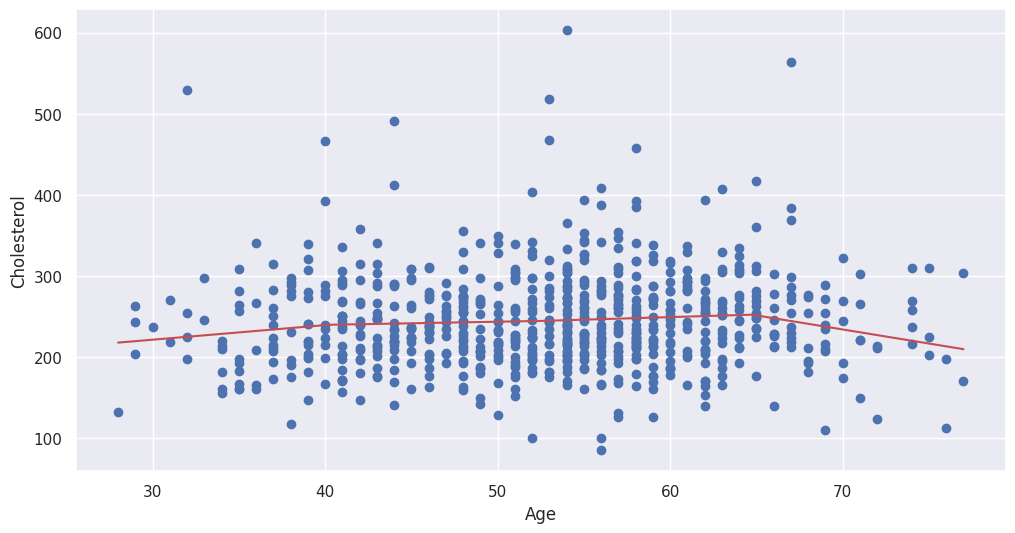

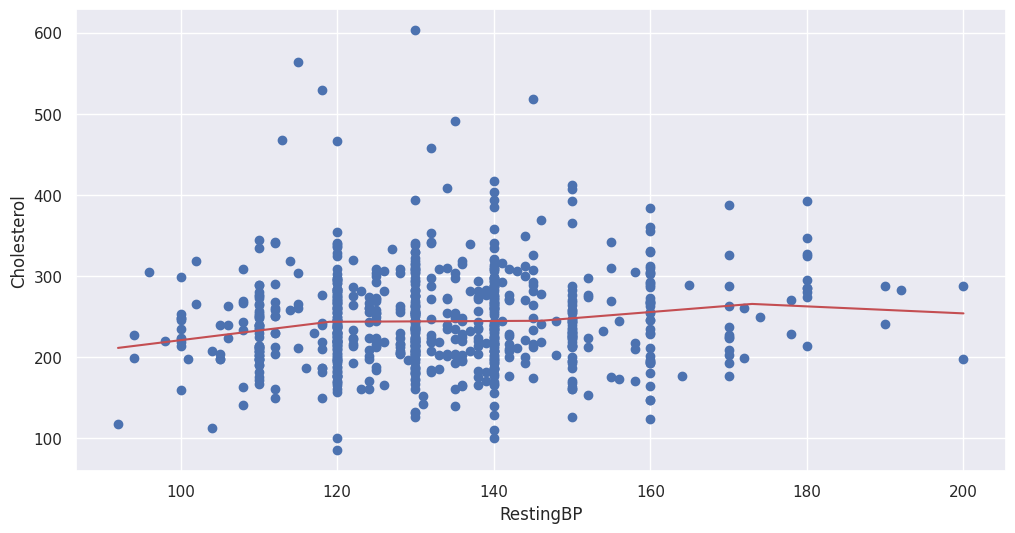

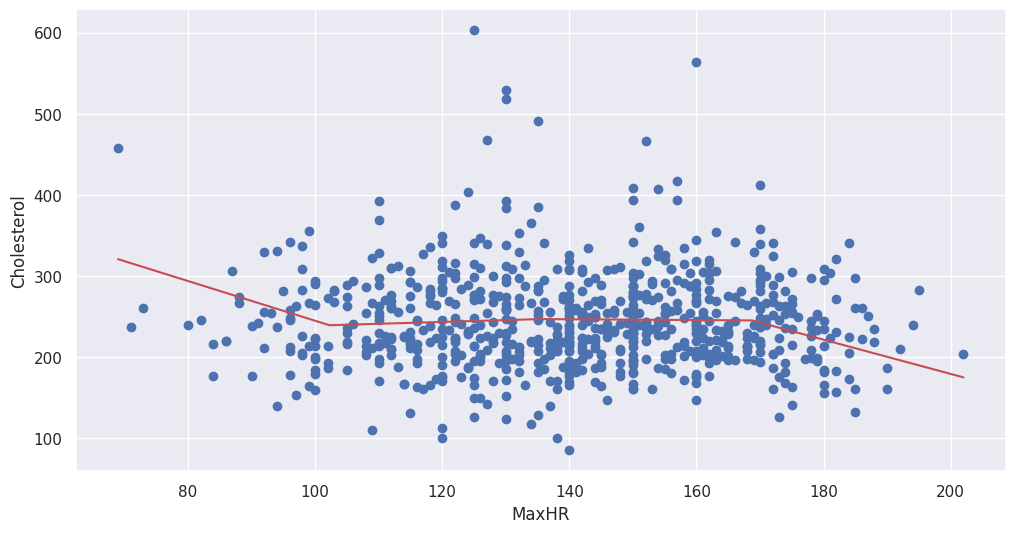

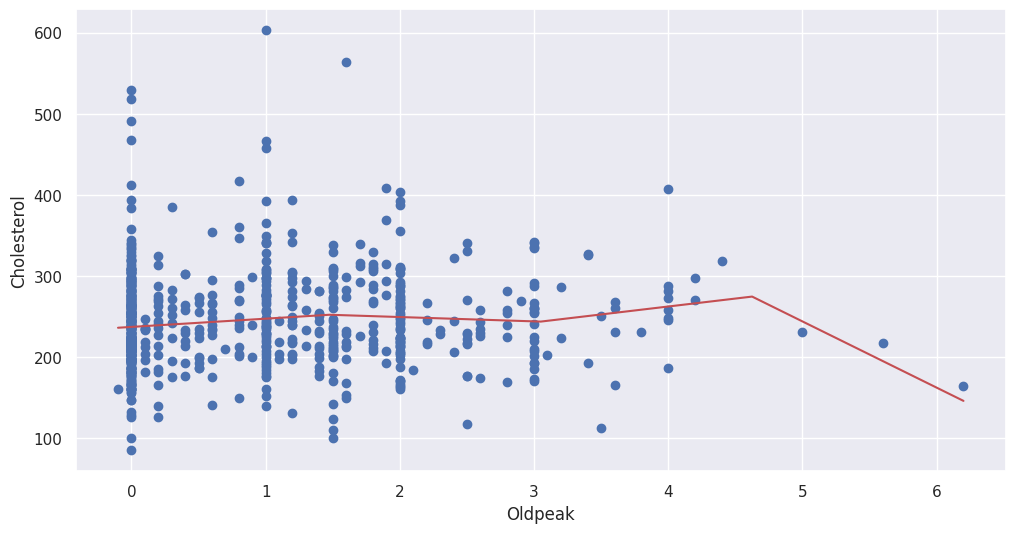

In [ ]:
# Import LinearRegression model from Scikit-Learn
continuos_f = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

for i in range(len(numeric_df_0r.columns)) :
    if i != 2 and i != 5: #skip plotting against itself and against HeartDisease
        
        x_df = numeric_df_0r.iloc[:, i]
        y_df = numeric_df_0r['Cholesterol']

        y_mod = np.polyfit(x_df, y_df, 5)
        y_pred = np.polyval(y_mod, x_df)

        model = np.poly1d(y_mod)
        polyline = np.linspace(min(x_df), max(x_df) , 5)
        
        plt.figure(figsize=(12, 6))
        plt.scatter(x_df, y_df, color = 'b')
        plt.plot(polyline, model(polyline), color = 'r')
        plt.ylabel('Cholesterol')
        plt.xlabel(continuos_f[i])
        
        #plt.show()
        MSE = round(np.square(np.subtract(y_df , y_pred)).mean())
        print("MSE = " + str(MSE) +" when modelled against " + continuos_f[i] + " and a poly degree of 5")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_df = numeric_df_0r[['Oldpeak','RestingBP']].values # use only two variables, can use more if want to
Y_df = numeric_df_0r['Cholesterol'].values
poly = PolynomialFeatures(degree= 1)

poly_x_values = poly.fit_transform(X_df)
poly.fit(poly_x_values, Y_df)

linreg = LinearRegression()
linreg.fit(poly_x_values, Y_df)

y_pred = linreg.predict(poly_x_values)

numeric_df1 = copy.deepcopy(numeric_df)
for i in range(len(numeric_df1)):
    if numeric_df1['Cholesterol'][i] == 0:
        numeric_df1.loc[i, "Cholesterol"] = round(y_pred[i])
        
numeric_df1.describe()



,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.883442,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.371014,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,243.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


##### Pick `Oldpeak` and `RestingBP` for multivariate polynomial regression of Cholesterol because it has the two lowest MSE when plotted against Cholesterol 

##Visual comparison of the 3 methods used to determine which is the most ideal one.

<Axes: xlabel='Cholesterol', ylabel='Count'>

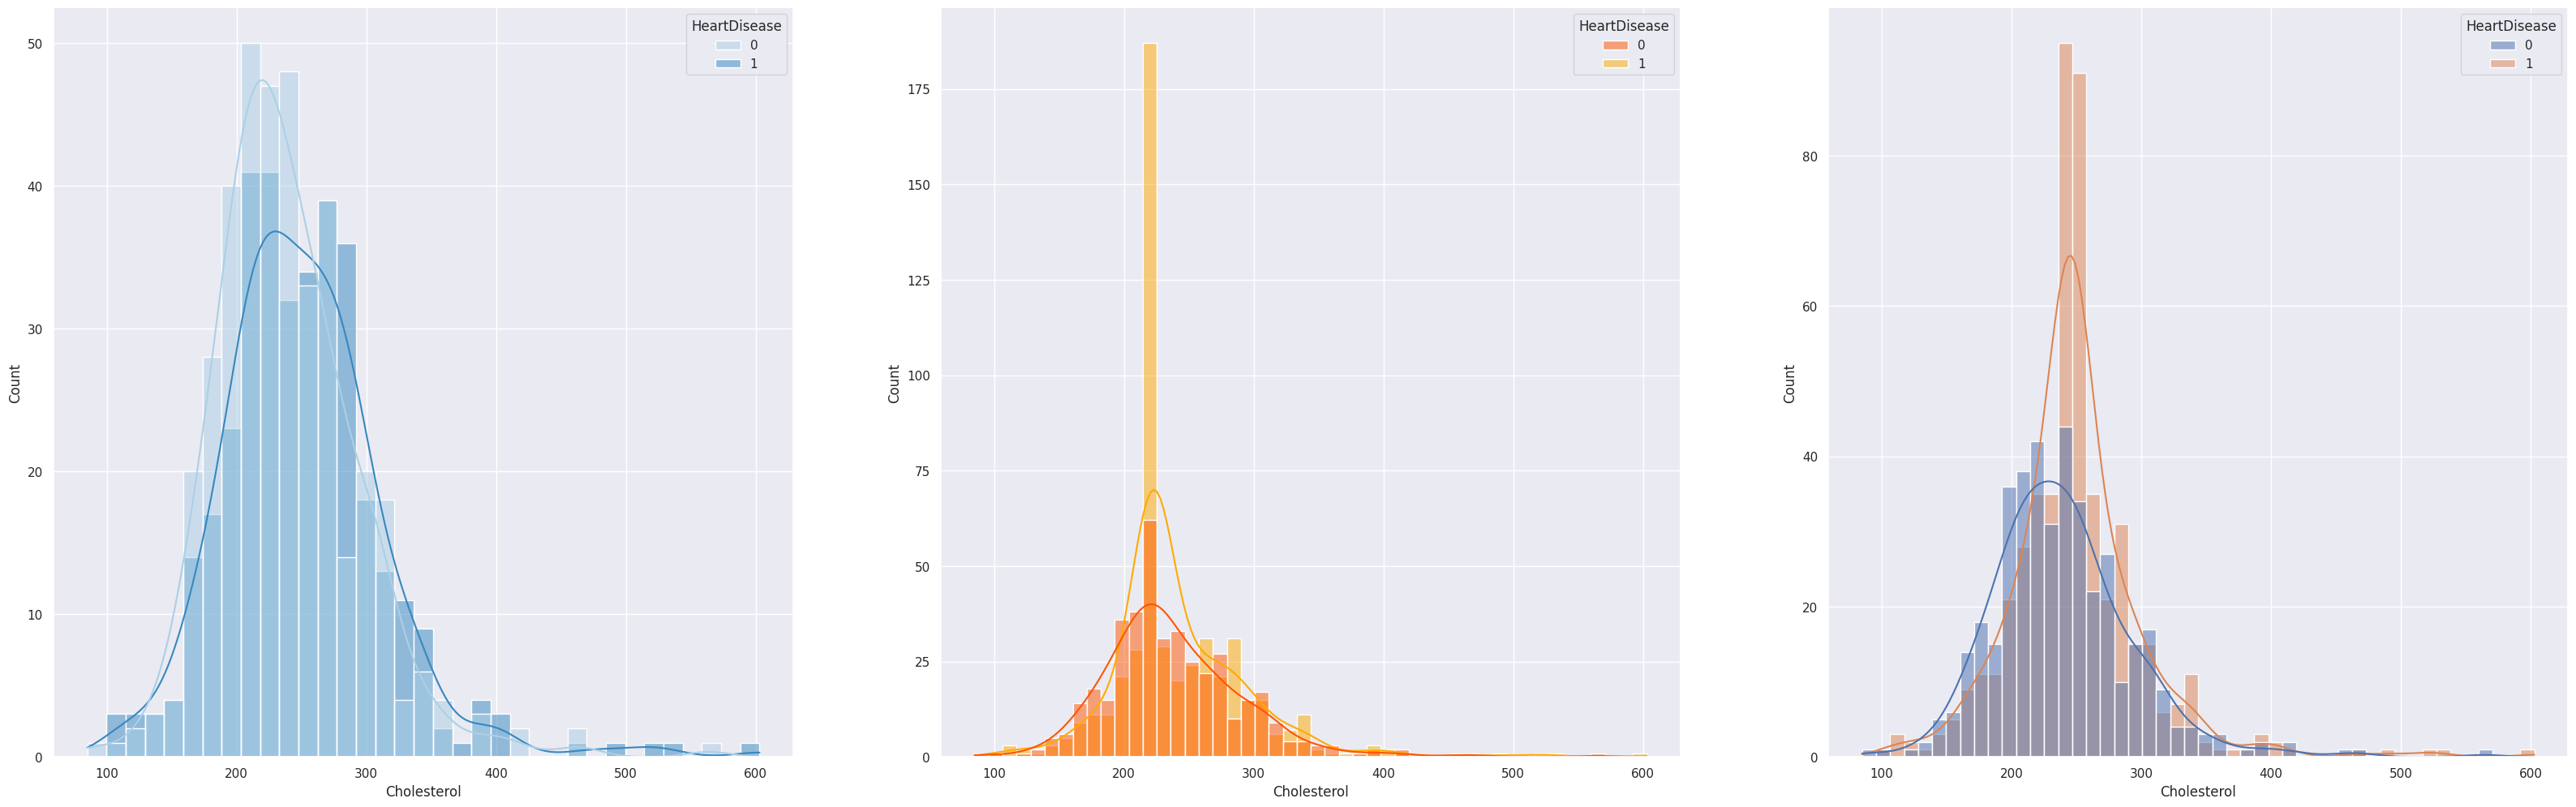

In [ ]:

f, axes = plt.subplots(1,3,figsize=(40,12))
plt.subplot(1,3,1)
sb.histplot(data = numeric_df_0r, x = 'Cholesterol', hue = "HeartDisease", kde=True,  palette="Blues") #Method A: removing all outliers of value 0
plt.subplot(1,3,2)
sb.histplot(data = numeric_df_rp, x = 'Cholesterol', hue = "HeartDisease", kde=True,  palette="autumn") #Method B: replacing all outliers with median value
plt.subplot(1,3,3)
sb.histplot(data = numeric_df1, x = 'Cholesterol', hue = "HeartDisease", kde=True,  palette="deep") #Method C: Replacing all values using multivariate poly regression 

---
## Best model: method C to do multivariate polynomial regression:

√ does not compromise the 171 rows 

√ doesn't obtain a distribution with small s.d. due to replacement with median values 

X median count still quite high

In [ ]:
newdf = pd.concat([categorical_df, numeric_df1], axis = 1)
newdf.to_csv('newHD.csv')

newdf.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,M,ATA,0,Normal,N,Up,40,140,289,172,0.0,0
1,F,NAP,0,Normal,N,Flat,49,160,180,156,1.0,1
2,M,ATA,0,ST,N,Up,37,130,283,98,0.0,0
3,F,ASY,0,Normal,Y,Flat,48,138,214,108,1.5,1
4,M,NAP,0,Normal,N,Up,54,150,195,122,0.0,0


----
End of Part 1: Data Cleaning completed

newHD.csv will be our new cleaned CSV



## Data visualisation of the cholestrol data points before and after data cleaning

<Axes: xlabel='Cholesterol', ylabel='Count'>

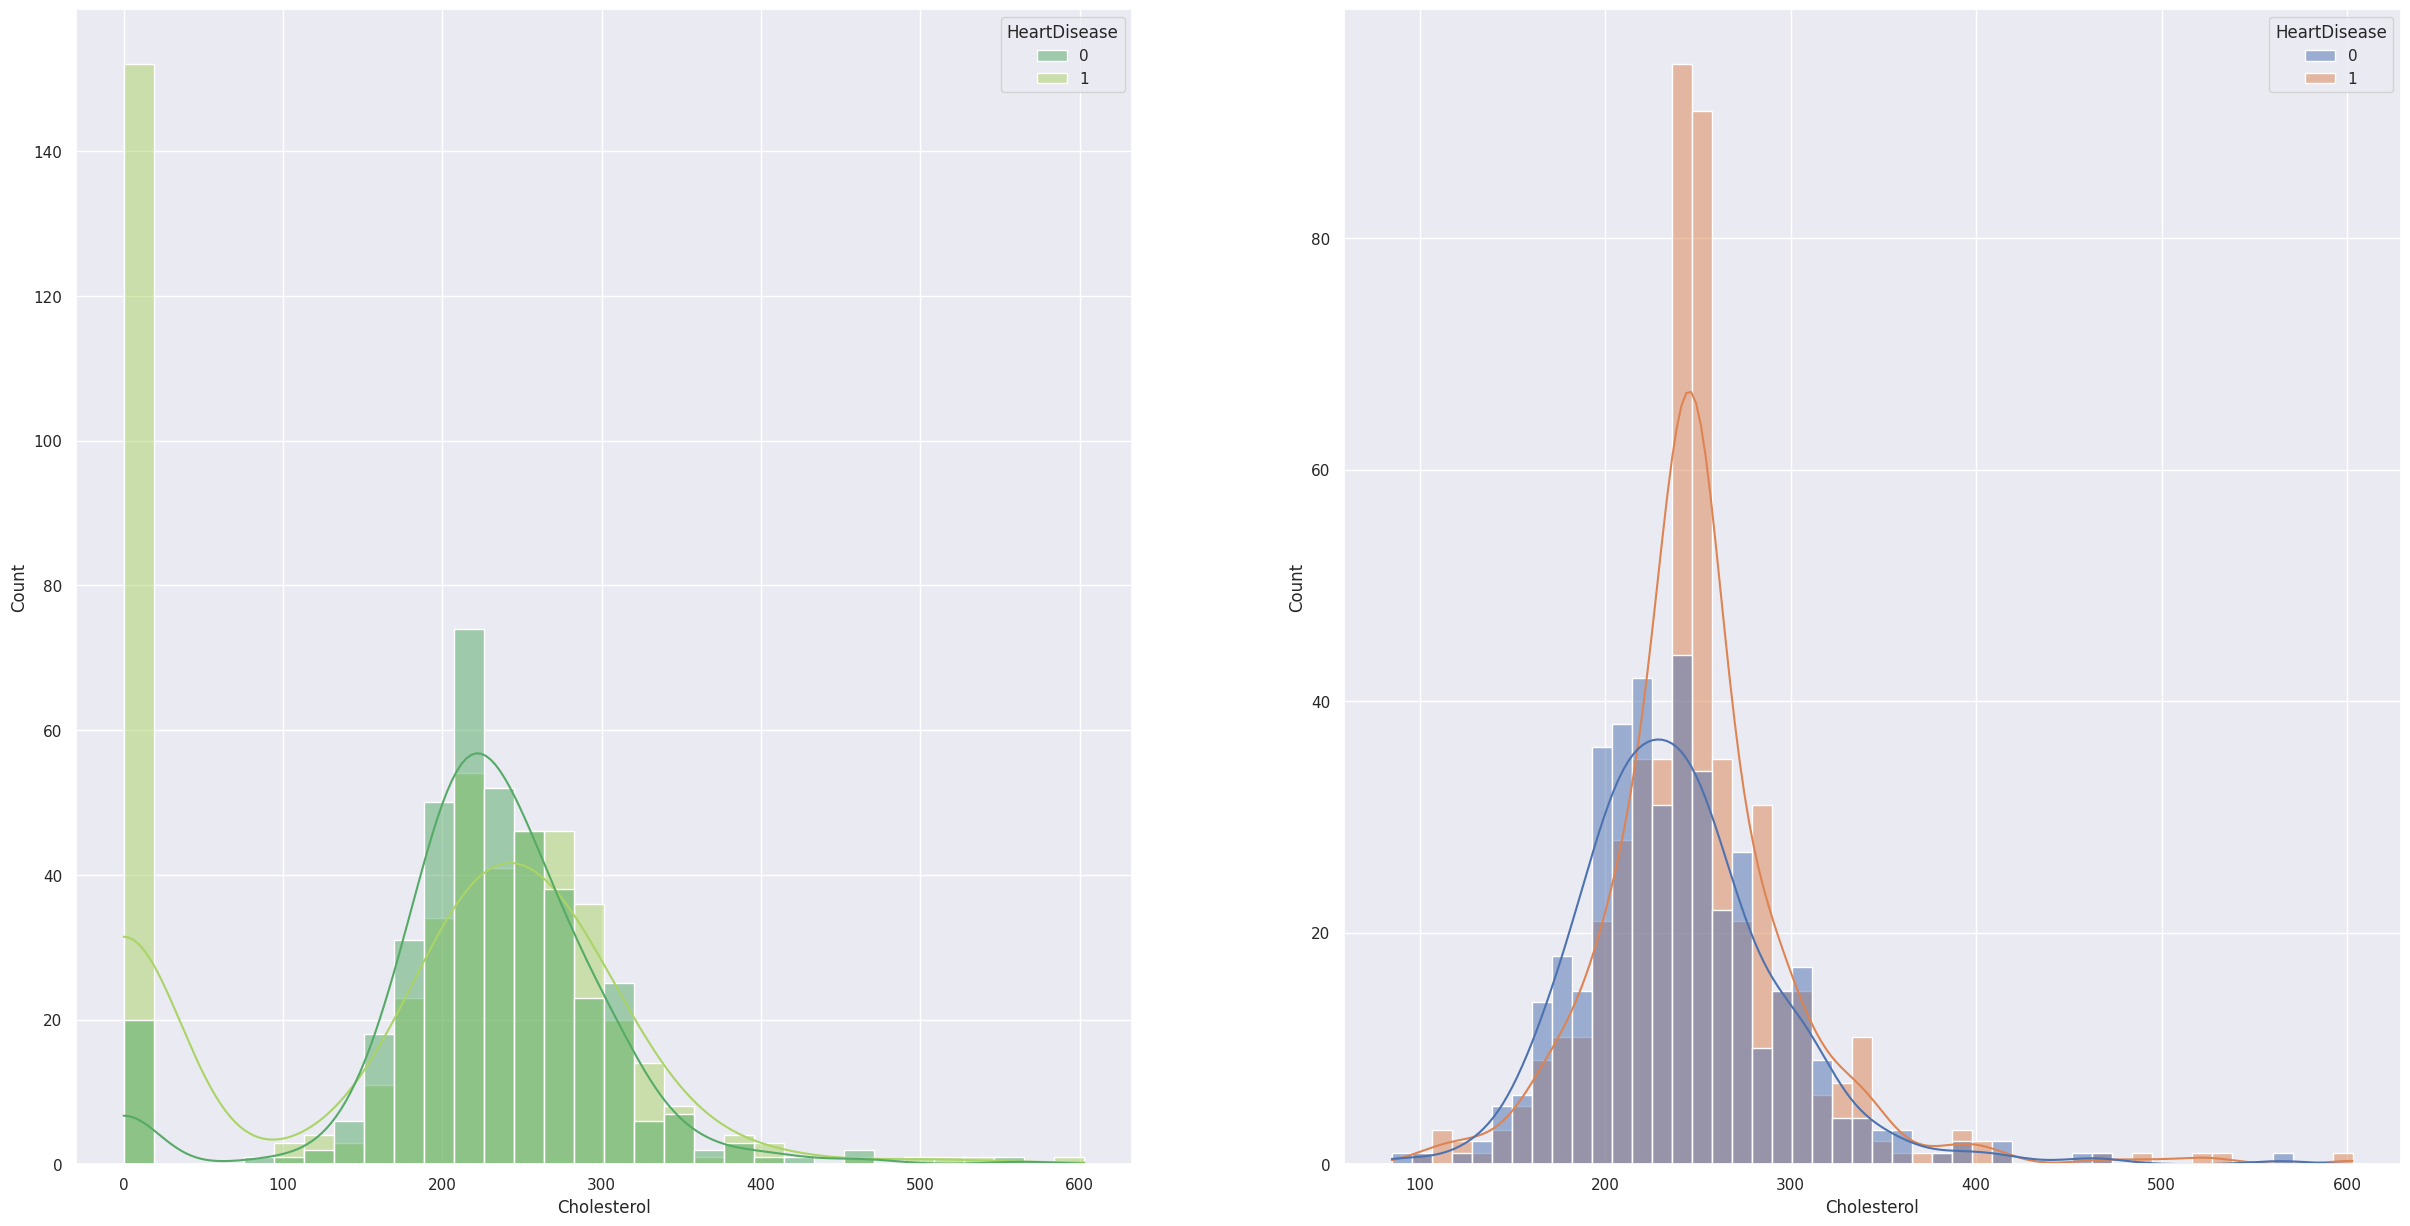

In [ ]:

f, axes = plt.subplots(1,2,figsize=(30,15))
plt.subplot(1,2,1)
sb.histplot(data = heartdata, x = "Cholesterol", hue = "HeartDisease", kde=True, palette="summer") #initial dataset
plt.subplot(1,2,2)
sb.histplot(data = numeric_df1, x = 'Cholesterol', hue = "HeartDisease", kde=True,  palette="deep") #cleaned dataset


The new cholesterol data points form a better fitting normal distribution curve. The graph is no longer bimodal and is a better representation of the distribution which should approximate into a normal distribution when n>=30